In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [5]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [6]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

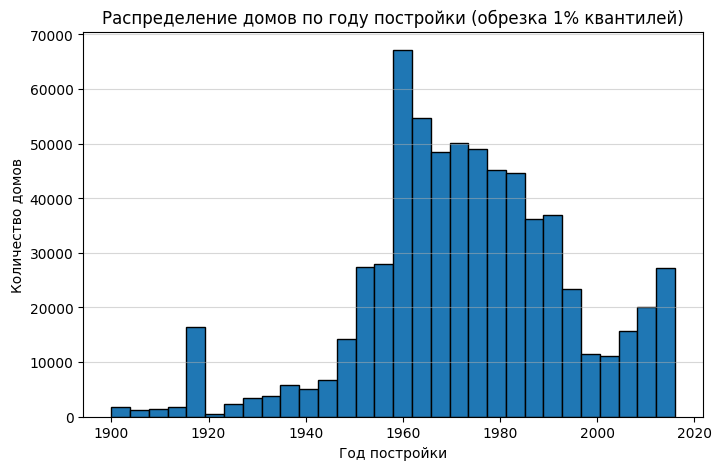

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [8]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


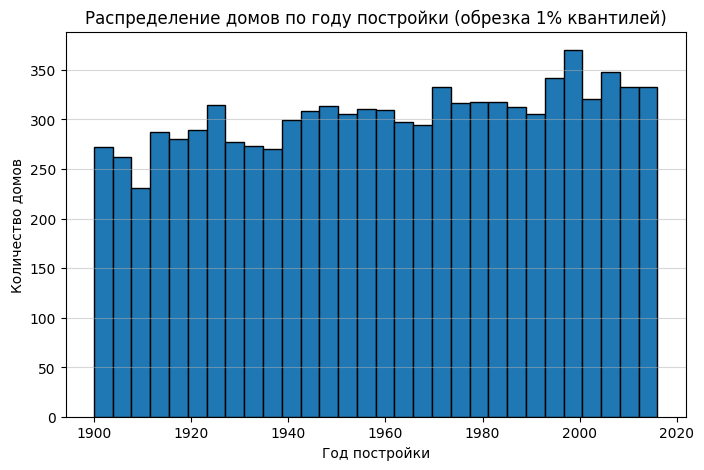

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [10]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [11]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [12]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [13]:
regions = [
    'Кировская',
    'Нижегородская',
    'Оренбургская',
    'Пензенская',
    'Пермский',
    'Башкортостан',
    'Марий Эл',
    'Мордовия',
    'Татарстан',
    'Удмуртская',
    'Чувашская',
    'Самарская',
    'Саратовская',
    'Ульяновская'
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [14]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
1586,Башкортостан,1965.0,F,499.30
1587,Башкортостан,1965.0,F,499.30
1588,Башкортостан,NaN,C,NaN
1589,Башкортостан,NaN,C,NaN
1590,Башкортостан,NaN,C,NaN
...,...,...,...,...
997342,Ульяновская,1978.0,D,2027.14
997343,Ульяновская,1977.0,D,2032.40
997344,Ульяновская,1984.0,D,1961.37
997345,Ульяновская,1984.0,D,1980.31


In [15]:
df_cut.isna().sum()

formalname_region        0
built_year           73036
energy_efficiency        0
area_total           31086
dtype: int64

In [16]:
df_cut_cleaned = df_cut.dropna()


In [17]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_13252\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [18]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
1586,Башкортостан,1965.0,F,499.30,748.950
1587,Башкортостан,1965.0,F,499.30,748.950
1599,Башкортостан,1985.0,D,785.70,785.700
1611,Башкортостан,1970.0,F,783.10,1174.650
1612,Башкортостан,1971.0,E,780.30,975.375
...,...,...,...,...,...
997342,Ульяновская,1978.0,D,2027.14,2027.140
997343,Ульяновская,1977.0,D,2032.40,2032.400
997344,Ульяновская,1984.0,D,1961.37,1961.370
997345,Ульяновская,1984.0,D,1980.31,1980.310


In [19]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [20]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Башкортостан,1500.0,B++,13677.993
1,Башкортостан,1775.0,D,6680.600
2,Башкортостан,1848.0,E,4299.875
3,Башкортостан,1870.0,E,1101.250
4,Башкортостан,1874.0,E,816.625
...,...,...,...,...
7497,Чувашская,2018.0,C,30084.050
7498,Чувашская,2018.0,D,33120.000
7499,Чувашская,2019.0,B+,8264.652
7500,Чувашская,2019.0,B++,7141.743


In [21]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Башкортостан,1500.0,13677.9930,1.367799e+04
1,Башкортостан,1775.0,6680.6000,2.035859e+04
2,Башкортостан,1848.0,4299.8750,2.465847e+04
3,Башкортостан,1870.0,1101.2500,2.575972e+04
4,Башкортостан,1874.0,816.6250,2.657634e+04
...,...,...,...,...
1727,Чувашская,2015.0,404519.6635,1.428461e+07
1728,Чувашская,2016.0,347819.9620,1.463243e+07
1729,Чувашская,2017.0,219730.6965,1.485216e+07
1730,Чувашская,2018.0,84544.6630,1.493671e+07


In [22]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Башкортостан,1500.0,13677.993,13677.993
1,Башкортостан,1775.0,6680.600,20358.593
2,Башкортостан,1848.0,4299.875,24658.468
3,Башкортостан,1870.0,1101.250,25759.718
4,Башкортостан,1874.0,816.625,26576.343


In [23]:
import pandas as pd

import pandas as pd

# данные
data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
        -12.41, -12.12, -12.66, -12.61, -12.18, -12.39, -11.88, -12.79, -12.28, -12.80,
        -12.68, -12.82, -12.09, -12.63, -12.63, -12.44, -12.48, -12.59, -12.34, -12.47,
        -11.90, -12.30, -12.03, -13.05, -13.25, -12.08, -12.06, -11.44, -12.21, -12.23,
        -11.09, -11.82, -11.46, -12.01, -12.09, -11.96, -11.33, -11.40, -11.71, -11.52,
        -11.02, -11.02, -10.65, -10.75, -10.64, -10.93, -10.59, -11.03, -10.24, -10.70,
        -10.90, -10.44, -11.22, -10.11, -10.23, -10.52, -9.95, -9.33, -10.15, -10.27,
        -10.00, -10.52, -8.92, -10.46, -10.30, -9.50, -10.01, -9.10, -9.01, -9.32, -9.51,
        -9.48, -9.11, -9.09, -9.15, -8.65, -9.11, -9.37, -8.89, -9.04, -8.19, -8.50, -8.91,
        -8.90, -9.11, -8.75, -9.73, -8.14, -7.84, -8.79, -8.02, -8.51, -8.71, -7.84, -8.23,
        -8.53, -8.24, -8.63, -8.51, -7.61, -7.83
    ]
}

df_pfo_climate = pd.DataFrame(data_climate)
df_pfo_climate

,Год,Зима
0,1960,-12.41
1,1961,-12.12
2,1962,-12.66
3,1963,-12.61
4,1964,-12.18
...,...,...
96,2056,-8.24
97,2057,-8.63
98,2058,-8.51
99,2059,-7.61


In [24]:

data_region_heat = {
    "Республика Башкортостан": [11853.3, 11539.4, 11980.8, 11673.7, 11923.4, 12066.8, 12355.4, 13025.3, 12404.5, 11798.3,
                                 12051.1, 12377.3, 12115.5, 11298.4, 11100.8, 10997.6, 10657.90, 10746.9, 10657.5, 10371.27,
                                 10014.06, 9973.29, 9986.4, 9575.0, 9881.1],
    "Республика Марий Эл": [1727.2, 1642.5, 1637.6, 1663.6, 1844.7, 1826.2, 1905.1, 1916.6, 1819.6, 1909.0,
                            1799.8, 1954.3, 1898.8, 1967.0, 1918.2, 1838.3, 1889.80, 1894.7, 1921, 1877.09,
                            1829.25, 1928.24, 1879.0, 1695.6, 1808.8],
    "Республика Мордовия": [1560.2, 1670.7, 1615.1, 1720.3, 1892.2, 1867.6, 1850.0, 1865, 1757.3, 1834.3,
                            1922.2, 1911.7, 1736.5, 1802.6, 1718.8, 1629.6, 1671.30, 1621.2, 1676.4, 1575.17,
                            1496.45, 1665.31, 1563.2, 1487.7, 1525.8],
    "Республика Татарстан(Татарстан)": [11644.5, 10932.3, 10494.4, 11413.1, 11959.5, 11529.3, 11169.0, 10892.4, 10833.7, 11226.7,
                                       11419.8, 11442.5, 10972.2, 10460.4, 11020.1, 10169.6, 10697.20, 10406.8, 10937.7, 10784.48,
                                       10283.93, 11218.83, 10863.3, 10500.4, 10581.8],
    "Удмуртская Республика": [5200.6, 5424.8, 5923.2, 5840.7, 6085.1, 5905.7, 6373.0, 5452.9, 5321.6, 5105.1,
                              4997.5, 4662.5, 4404.5, 4309.5, 3988.3, 4255.8, 4056.40, 4294.3, 4209.4, 4303.12,
                              4142.46, 4041.02, 4222.6, 3970.8, 4259.2],
    "Чувашская Республика(Чувашия)": [3194.8, 3248.3, 3395.9, 3412.1, 3533.4, 3516.8, 3528.0, 3455.3, 3257.5, 3357.1,
                                      3347.1, 3195.4, 2942.2, 2841.5, 2852.7, 2586.5, 2763.00, 2655.9, 2630.8, 2642.03,
                                      2597.17, 2910.73, 2772.4, 2602.0, 2702.0],
    "Пермский край": [11169.1, 11027.1, 10987, 10428.3, 10392.1, 12251.7, 12586.7, 11670.1, 10610.9, 11156.7,
                      11057.5, 10461.1, 10296.9, 10182.6, 9689.9, 9362.2, 9275.60, 9232.6, 8997.5, 8652.6,
                      8179.21, 8874.48, 8819.6, 8386.1, 8914.2],
    "Кировская область": [4852, 4998.9, 5172.2, 4996.5, 5120.9, 5235.7, 5194.1, 4898.7, 4258.3, 4648.3,
                          4943.8, 4368.6, 4287.8, 4148.2, 4272.9, 4144.3, 4325.40, 4251.6, 4144.6, 4125.39,
                          4064.20, 4045.92, 4367.1, 4073.8, 4241.9],
    "Нижегородская область": [12440, 11579.2, 11489.7, 11387.4, 11298.5, 11743.7, 12103.0, 11566.3, 11232.1, 11701.0,
                              12054.4, 11787.5, 11481.7, 10886.4, 10737.9, 10251.1, 10478.90, 10164.1, 10238.6, 10092.15,
                              9959.02, 10572.97, 10404.0, 10054.9, 10137.4],
    "Оренбургская область": [7016.3, 6949.4, 6743.3, 6764, 6383.2, 6046.1, 5811.4, 5971.8, 5785.0, 5651.4,
                             5720.9, 5836.4, 5194.8, 5170.6, 5543.2, 5190.3, 5277.60, 5313.6, 5426.8, 5881.95,
                             5238.26, 5249.31, 5248.8, 5184.2, 5171.2],
    "Пензенская область": [2587.2, 3214.7, 3584.7, 3414.4, 3514.8, 3506.6, 3314.9, 3147.9, 2795.7, 3122.6,
                           3122.8, 3122.8, 2812.6, 2791.1, 2748.9, 2754.6, 2768.90, 2754.9, 2852.1, 2767.44,
                           2713.04, 2834.15, 2737.7, 2652.6, 2732.7],
    "Самарская область": [13628.6, 13505.9, 13359.7, 12978.7, 13096, 13594.3, 13661.9, 13898.8, 12993.2, 13367.0,
                          13092.0, 13485.4, 12571.6, 12684.3, 12502.3, 12076.5, 12011.10, 12315.3, 12095.4, 11961.98,
                          11907.06, 11632.38, 12046.0, 11714.4, 11895.8],
    "Саратовская область": [6672.8, 6711.4, 7341.7, 7191.7, 7196.4, 7293.4, 7943.9, 5542.6, 5668.0, 6175.0,
                             6298.3, 6311.9, 5996.8, 6023.8, 5790.2, 5500.3, 5319.90, 5086.4, 5570.5, 5427.95,
                             5289.89, 5339.57, 5207.0, 5004.6, 5250.9],
    "Ульяновская область": [3595.2, 3432.9, 3465.8, 3370.1, 3654.3, 4227.6, 4072.6, 4143.6, 4183.9, 4426.7,
                             3951.8, 4134.7, 3768.2, 3725.8, 3806.0, 3655.4, 3601.10, 3686.2, 3672.7, 3746.63,
                             3328.71, 3647.33, 3465.0, 3417.8, 3490.0]
}

years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Республика Башкортостан,11853.3,11539.4,11980.8,11673.7,11923.4,12066.8,12355.4,13025.3,12404.5,11798.3,...,10997.6,10657.9,10746.9,10657.5,10371.27,10014.06,9973.29,9986.4,9575.0,9881.1
Республика Марий Эл,1727.2,1642.5,1637.6,1663.6,1844.7,1826.2,1905.1,1916.6,1819.6,1909.0,...,1838.3,1889.8,1894.7,1921.0,1877.09,1829.25,1928.24,1879.0,1695.6,1808.8
Республика Мордовия,1560.2,1670.7,1615.1,1720.3,1892.2,1867.6,1850.0,1865.0,1757.3,1834.3,...,1629.6,1671.3,1621.2,1676.4,1575.17,1496.45,1665.31,1563.2,1487.7,1525.8
Республика Татарстан(Татарстан),11644.5,10932.3,10494.4,11413.1,11959.5,11529.3,11169.0,10892.4,10833.7,11226.7,...,10169.6,10697.2,10406.8,10937.7,10784.48,10283.93,11218.83,10863.3,10500.4,10581.8
Удмуртская Республика,5200.6,5424.8,5923.2,5840.7,6085.1,5905.7,6373.0,5452.9,5321.6,5105.1,...,4255.8,4056.4,4294.3,4209.4,4303.12,4142.46,4041.02,4222.6,3970.8,4259.2
Чувашская Республика(Чувашия),3194.8,3248.3,3395.9,3412.1,3533.4,3516.8,3528.0,3455.3,3257.5,3357.1,...,2586.5,2763.0,2655.9,2630.8,2642.03,2597.17,2910.73,2772.4,2602.0,2702.0
Пермский край,11169.1,11027.1,10987.0,10428.3,10392.1,12251.7,12586.7,11670.1,10610.9,11156.7,...,9362.2,9275.6,9232.6,8997.5,8652.60,8179.21,8874.48,8819.6,8386.1,8914.2
Кировская область,4852.0,4998.9,5172.2,4996.5,5120.9,5235.7,5194.1,4898.7,4258.3,4648.3,...,4144.3,4325.4,4251.6,4144.6,4125.39,4064.20,4045.92,4367.1,4073.8,4241.9
Нижегородская область,12440.0,11579.2,11489.7,11387.4,11298.5,11743.7,12103.0,11566.3,11232.1,11701.0,...,10251.1,10478.9,10164.1,10238.6,10092.15,9959.02,10572.97,10404.0,10054.9,10137.4
Оренбургская область,7016.3,6949.4,6743.3,6764.0,6383.2,6046.1,5811.4,5971.8,5785.0,5651.4,...,5190.3,5277.6,5313.6,5426.8,5881.95,5238.26,5249.31,5248.8,5184.2,5171.2


In [25]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Башкортостан,1500.0,13677.9930,1.367799e+04
1,Башкортостан,1775.0,6680.6000,2.035859e+04
2,Башкортостан,1848.0,4299.8750,2.465847e+04
3,Башкортостан,1870.0,1101.2500,2.575972e+04
4,Башкортостан,1874.0,816.6250,2.657634e+04
...,...,...,...,...
1727,Чувашская,2015.0,404519.6635,1.428461e+07
1728,Чувашская,2016.0,347819.9620,1.463243e+07
1729,Чувашская,2017.0,219730.6965,1.485216e+07
1730,Чувашская,2018.0,84544.6630,1.493671e+07


In [26]:
df_merged = df_grouped.merge(
    df_pfo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [27]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Башкортостан,1500.0,13677.9930,1.367799e+04,NaN
1,Башкортостан,1775.0,6680.6000,2.035859e+04,NaN
2,Башкортостан,1848.0,4299.8750,2.465847e+04,NaN
3,Башкортостан,1870.0,1101.2500,2.575972e+04,NaN
4,Башкортостан,1874.0,816.6250,2.657634e+04,NaN
...,...,...,...,...,...
1727,Чувашская,2015.0,404519.6635,1.428461e+07,-10.52
1728,Чувашская,2016.0,347819.9620,1.463243e+07,-9.95
1729,Чувашская,2017.0,219730.6965,1.485216e+07,-9.33
1730,Чувашская,2018.0,84544.6630,1.493671e+07,-10.15


In [28]:
import re

def clean_region_name(name: str) -> str:

    # Спец. случаи для республик с альтернативными названиями
    if re.search(r"Татарстан", name, flags=re.IGNORECASE):
        # Если в скобках "Татарстан", оставляем именно это
        match = re.search(r"\(([^)]+)\)", name)
        if match and "татарстан" in match.group(1).lower():
            return match.group(1)

    if re.search(r"Чуваш", name, flags=re.IGNORECASE):
        # Если в скобках "Чувашия", убираем скобки и оставляем основное название
        name = re.sub(r"\s*\(.*\)", "", name)

    # Универсально убираем слова "Республика", "область", "край", "автономный округ" и др.
    # как в начале, так и в конце строки
    name = re.sub(r"^(Республика|область|край|авт\.?\.?\s*округ)\s+", "", name, flags=re.IGNORECASE)
    name = re.sub(r"\s+(Республика|область|край|авт\.?\.?\s*округ)$", "", name, flags=re.IGNORECASE)

    # Чистим лишние пробелы
    name = " ".join(name.split())
    
    return name


# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)

# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)

df_final


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Башкортостан,1500.0,13677.9930,1.367799e+04,NaN,NaN
1,Башкортостан,1775.0,6680.6000,2.035859e+04,NaN,NaN
2,Башкортостан,1848.0,4299.8750,2.465847e+04,NaN,NaN
3,Башкортостан,1870.0,1101.2500,2.575972e+04,NaN,NaN
4,Башкортостан,1874.0,816.6250,2.657634e+04,NaN,NaN
...,...,...,...,...,...,...
1727,Чувашская,2015.0,404519.6635,1.428461e+07,-10.52,2586.50
1728,Чувашская,2016.0,347819.9620,1.463243e+07,-9.95,2763.00
1729,Чувашская,2017.0,219730.6965,1.485216e+07,-9.33,2655.90
1730,Чувашская,2018.0,84544.6630,1.493671e+07,-10.15,2630.80


In [29]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Башкортостан,1500.0,13677.9930,1.367799e+04,NaN,NaN
1,Башкортостан,1775.0,6680.6000,2.035859e+04,NaN,NaN
2,Башкортостан,1848.0,4299.8750,2.465847e+04,NaN,NaN
3,Башкортостан,1870.0,1101.2500,2.575972e+04,NaN,NaN
4,Башкортостан,1874.0,816.6250,2.657634e+04,NaN,NaN
...,...,...,...,...,...,...
1727,Чувашская,2015.0,404519.6635,1.428461e+07,-10.52,2586.50
1728,Чувашская,2016.0,347819.9620,1.463243e+07,-9.95,2763.00
1729,Чувашская,2017.0,219730.6965,1.485216e+07,-9.33,2655.90
1730,Чувашская,2018.0,84544.6630,1.493671e+07,-10.15,2630.80


In [30]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


     built_year formalname_region  area_eff_cumsum  climate_winter
98       2000.0      Башкортостан         0.635327        0.086957
99       2001.0      Башкортостан         0.645853        0.086957
100      2002.0      Башкортостан         0.654573        0.247826
101      2003.0      Башкортостан         0.664056        0.204348
102      2004.0      Башкортостан         0.673092        0.252174


In [31]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
98,Башкортостан,2000.0,577867.3825,0.635327,0.086957,11853.30
99,Башкортостан,2001.0,683034.1660,0.645853,0.086957,11539.40
100,Башкортостан,2002.0,565914.1050,0.654573,0.247826,11980.80
101,Башкортостан,2003.0,615413.8770,0.664056,0.204348,11673.70
102,Башкортостан,2004.0,586333.9733,0.673092,0.252174,11923.40
...,...,...,...,...,...,...
1727,Чувашская,2015.0,404519.6635,0.102839,0.304348,2586.50
1728,Чувашская,2016.0,347819.9620,0.108199,0.552174,2763.00
1729,Чувашская,2017.0,219730.6965,0.111585,0.821739,2655.90
1730,Чувашская,2018.0,84544.6630,0.112888,0.465217,2630.80


Intercept: 3817.5444922024517
Coef area_eff_cumsum: -3.6292069375936525e-05
Coef climate_winter: -386.9719958420474


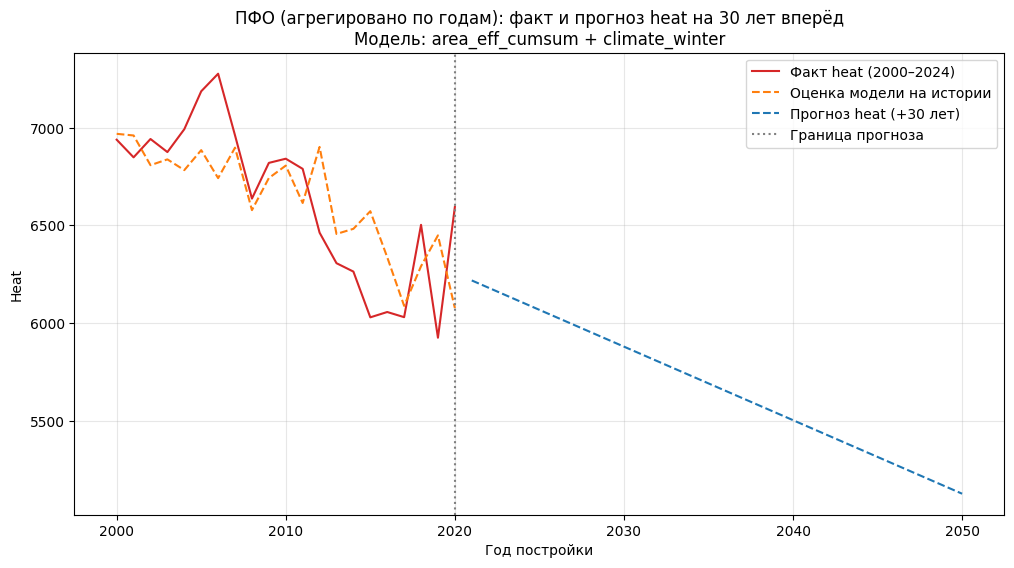

    built_year         heat  area_eff_cumsum  climate_winter    heat_pred  \
11      2011.0  6789.435714     3.424435e+07      -10.440000  6614.733844   
12      2012.0  6462.864286     3.465552e+07      -11.220000  6901.649830   
13      2013.0  6306.585714     3.509453e+07      -10.110000  6456.178397   
14      2014.0  6263.585714     3.564611e+07      -10.230000  6482.596731   
15      2015.0  6029.435714     3.625608e+07      -10.520000  6572.681883   
16      2016.0  6056.721429     3.666814e+07       -9.950000  6337.153316   
17      2017.0  6030.321429     3.691690e+07       -9.330000  6088.202493   
18      2018.0  6502.858333     4.006554e+07      -10.150000  6291.248925   
19      2019.0  5925.155455     3.699991e+07      -10.270000  6448.943758   
20      2020.0  6594.070000     4.437343e+07      -10.000000  6076.861021   
21      2021.0  6218.306748     3.987482e+07       -9.943619          NaN   
22      2022.0  6180.663245     4.036397e+07       -9.892216          NaN   

In [32]:
#ПФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ПФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: 3817.5444922024517
Coef area_eff_cumsum: -3.6292069375936525e-05
Coef climate_winter: -386.9719958420474

Неверные знаки, применяем жёсткую регрессию...
Жёсткая модель:
Intercept: 1.441394826188116
Coef area_eff_cumsum: 0.0
Coef climate_winter: -630.9747684053922
R2 жёсткой модели: 0.4001334979260548


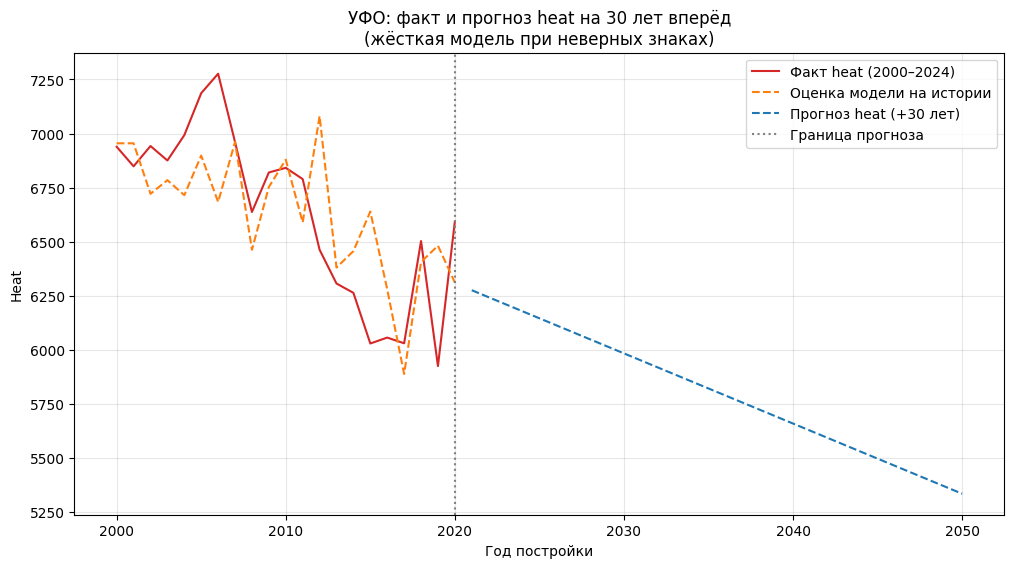

    built_year         heat    heat_pred     type
11      2011.0  6789.435714  6588.817977     Факт
12      2012.0  6462.864286  7080.978296     Факт
13      2013.0  6306.585714  6380.596303     Факт
14      2014.0  6263.585714  6456.313276     Факт
15      2015.0  6029.435714  6639.295958     Факт
16      2016.0  6056.721429  6279.640340     Факт
17      2017.0  6030.321429  5888.435984     Факт
18      2018.0  6502.858333  6405.835294     Факт
19      2019.0  5925.155455  6481.552266     Факт
20      2020.0  6594.070000  6311.189079     Факт
21      2021.0  6275.614121          NaN  Прогноз
22      2022.0  6243.180379          NaN  Прогноз
23      2023.0  6210.746637          NaN  Прогноз
24      2024.0  6178.312895          NaN  Прогноз
25      2025.0  6145.879153          NaN  Прогноз
26      2026.0  6113.445411          NaN  Прогноз
27      2027.0  6081.011669          NaN  Прогноз
28      2028.0  6048.577927          NaN  Прогноз
29      2029.0  6016.144185          NaN  Прогноз


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("УФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


Intercept: 6760.353605684172
Coef area_eff_cumsum (std): 678.0509957568057
Coef climate_winter (std): -293.33296466392676


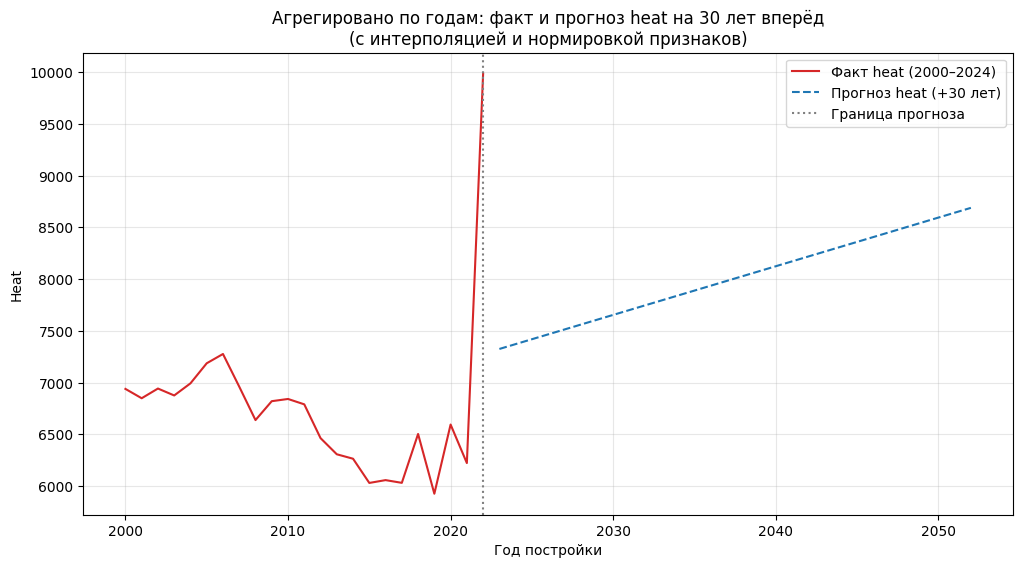

In [34]:
#ПФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2025)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


R2 базовой модели: 0.6418
Базовые коэффициенты: [-245.61019936 -100.29482946] Intercept: 6634.301046536798
R2 жёсткой модели: 0.4283
Финальные коэффициенты с фиксированными знаками: [   0.         -262.04743076] Intercept: 6634.301046536798


C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


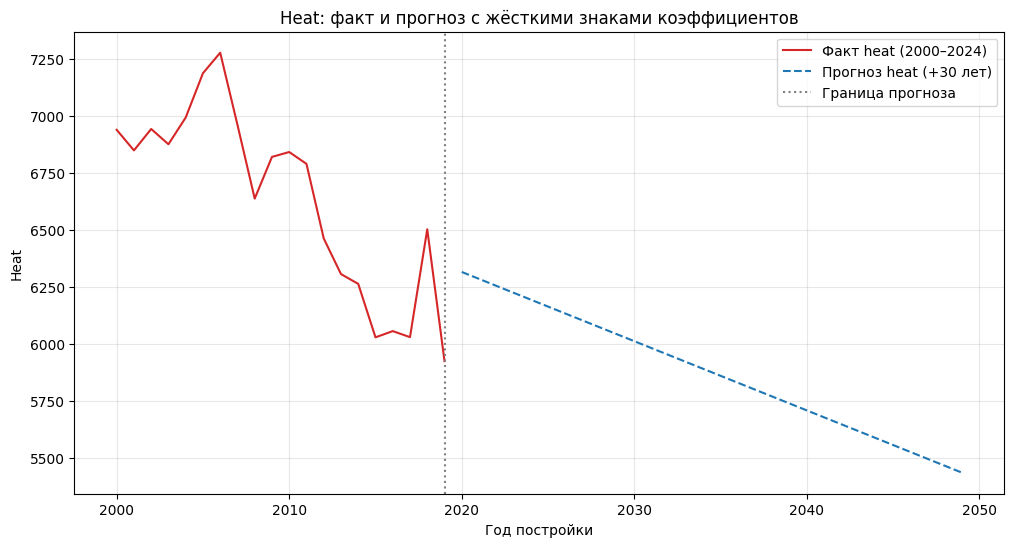

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2019)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


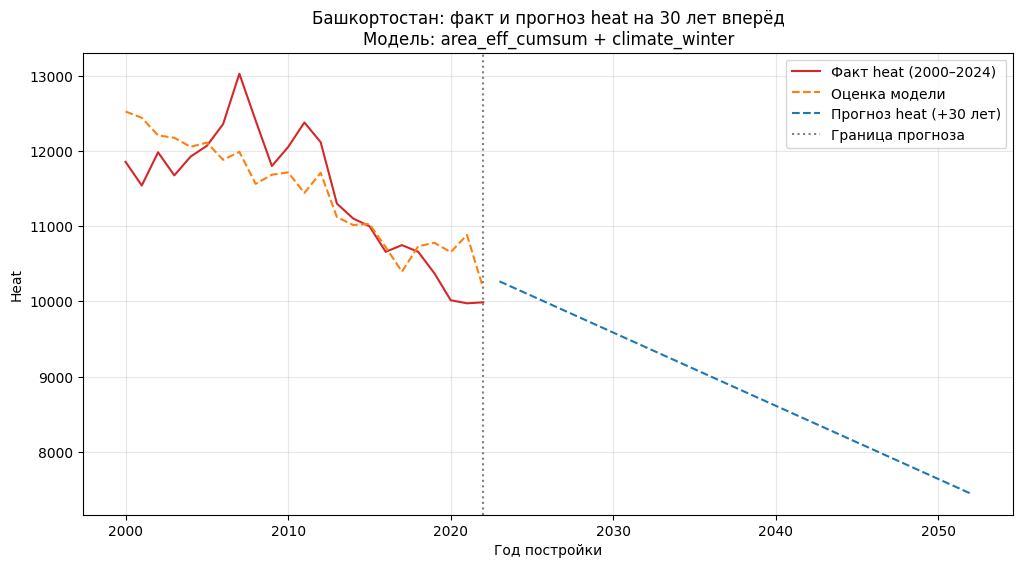

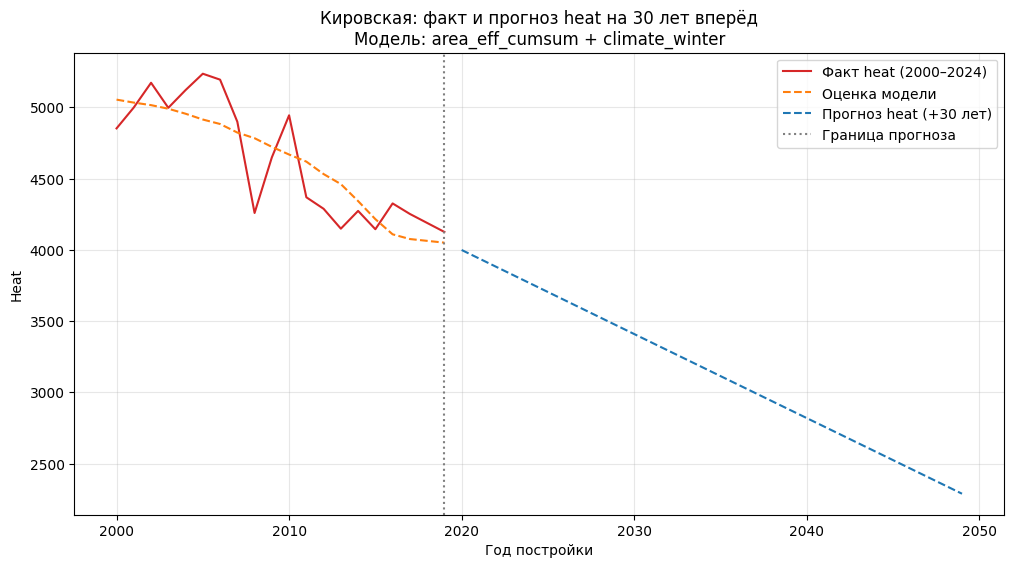

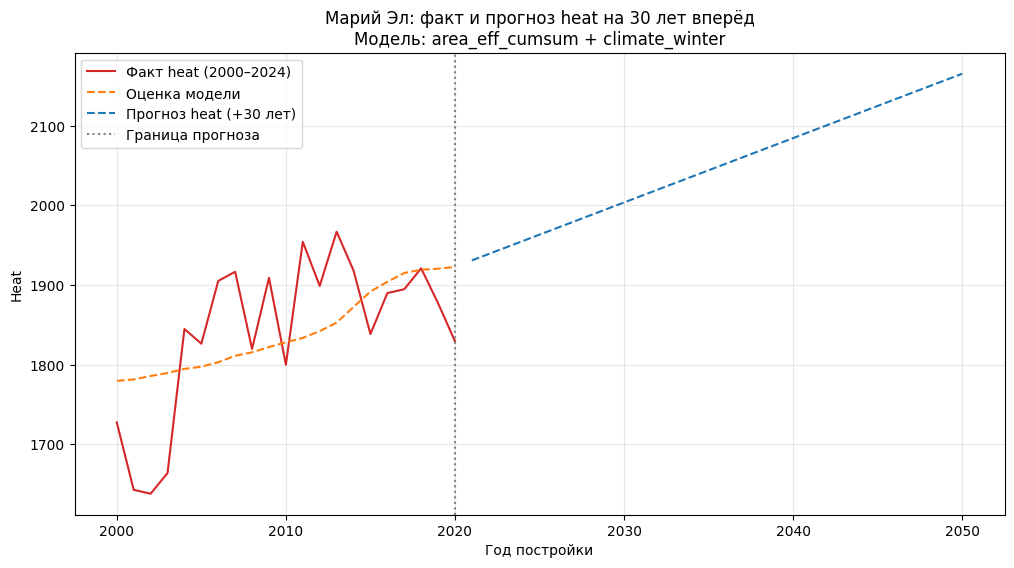

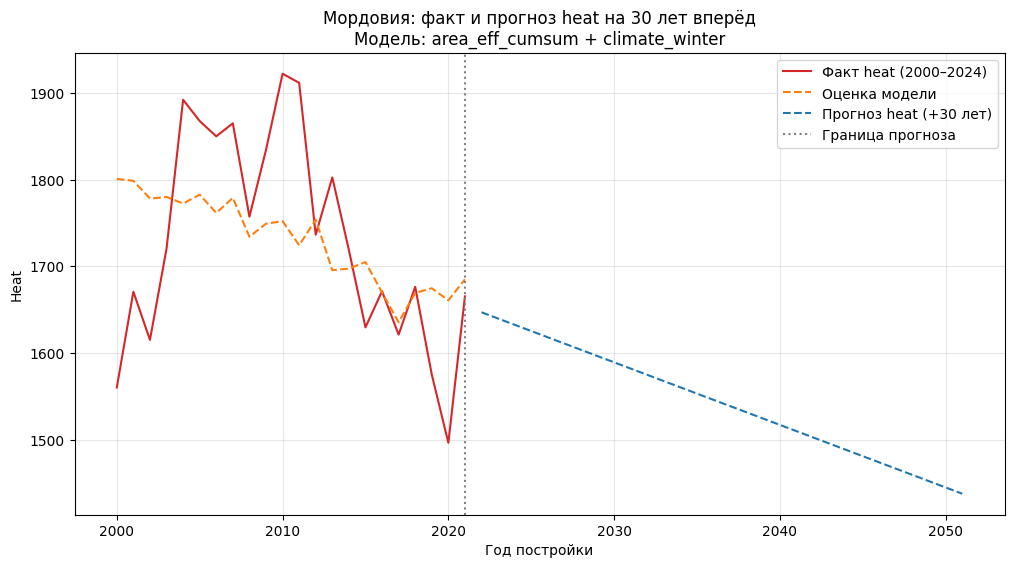

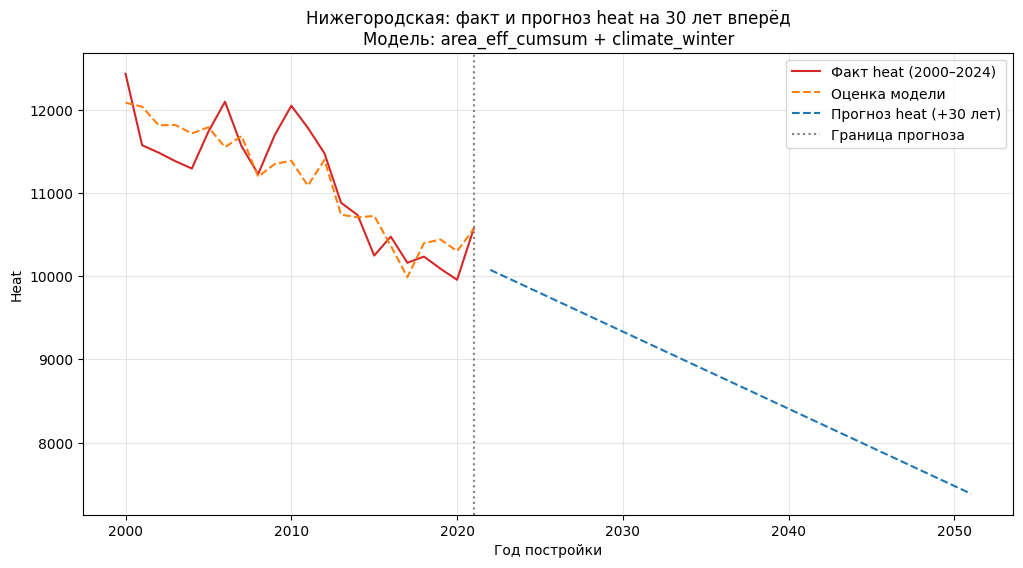

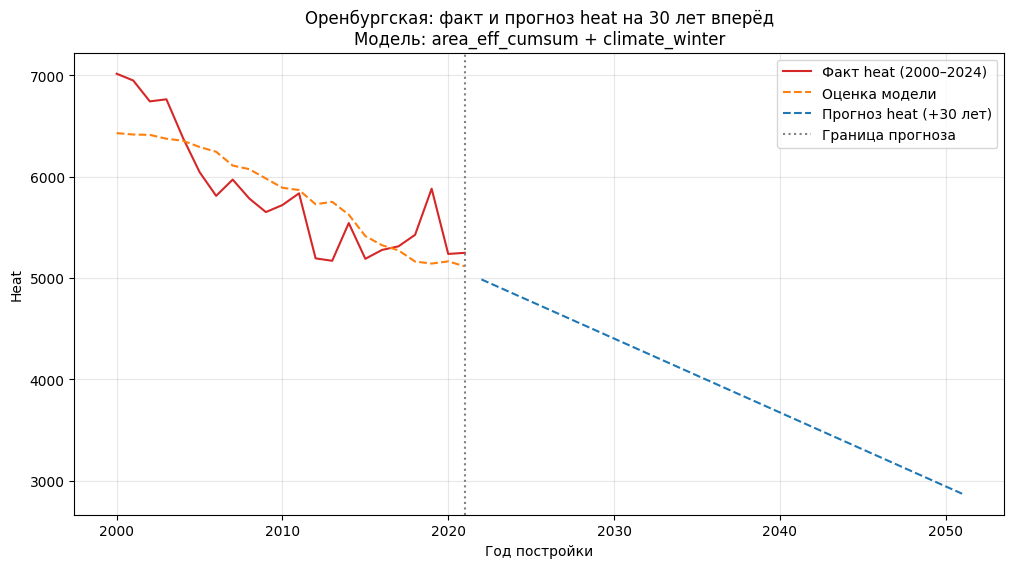

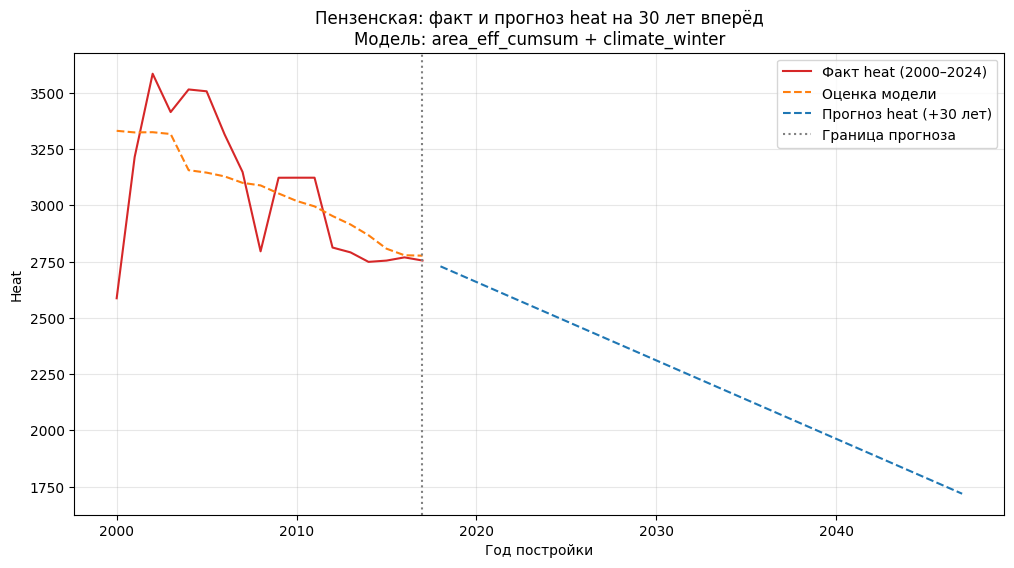

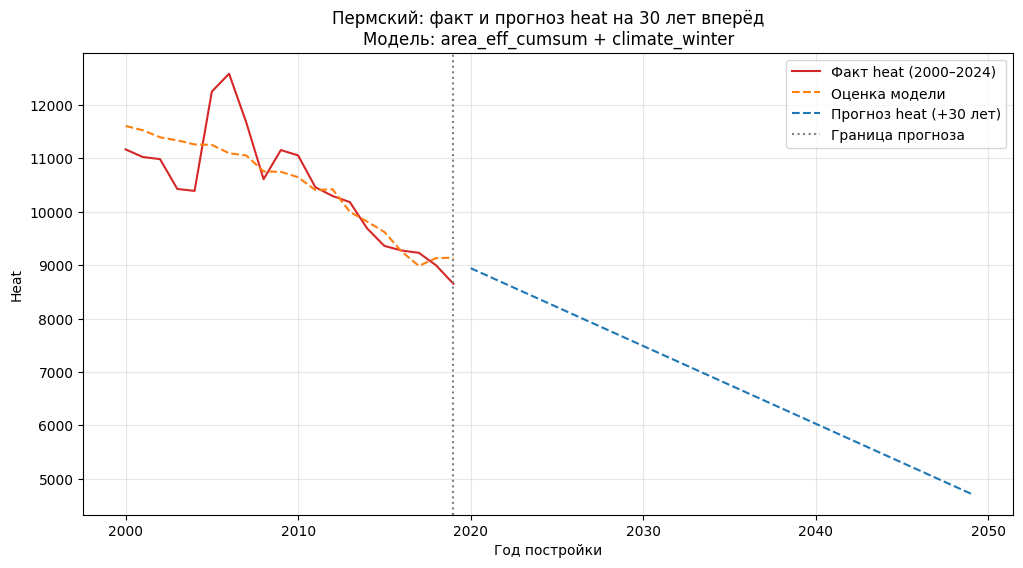

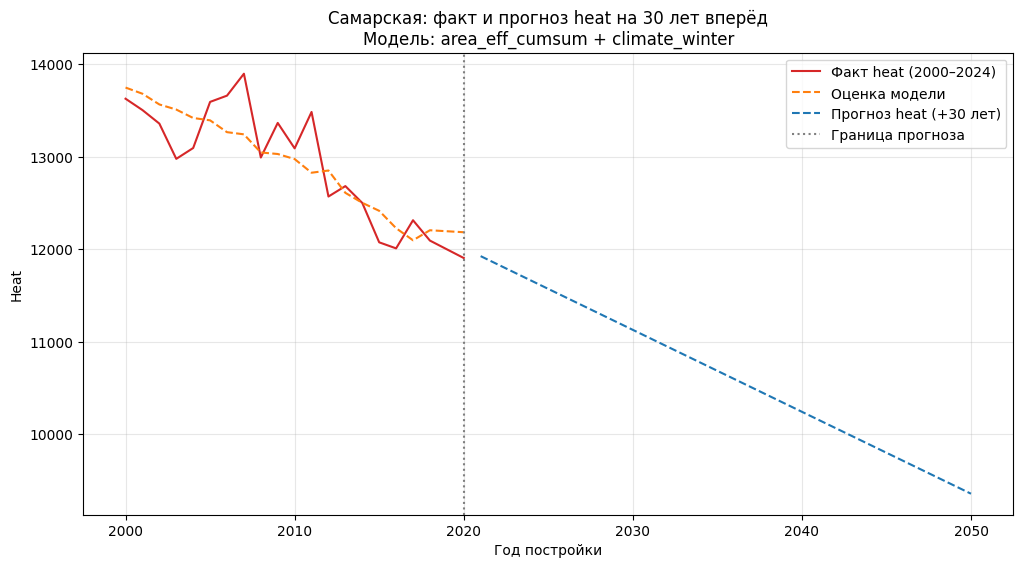

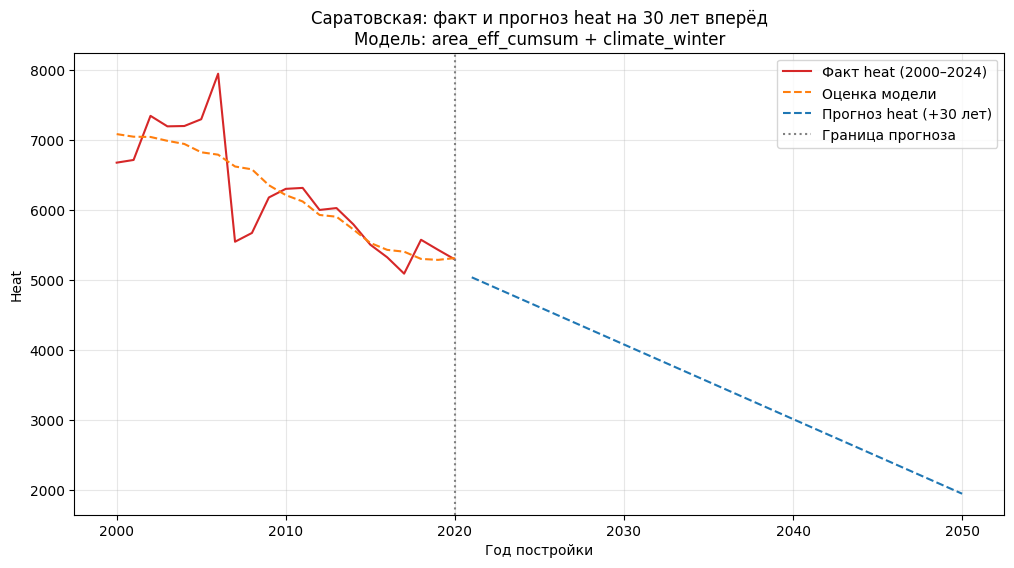

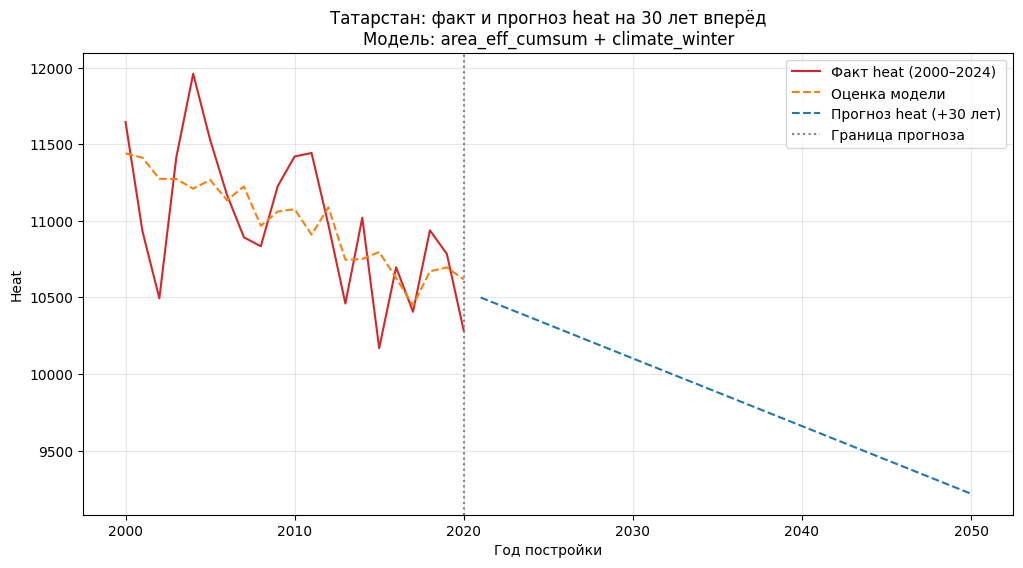

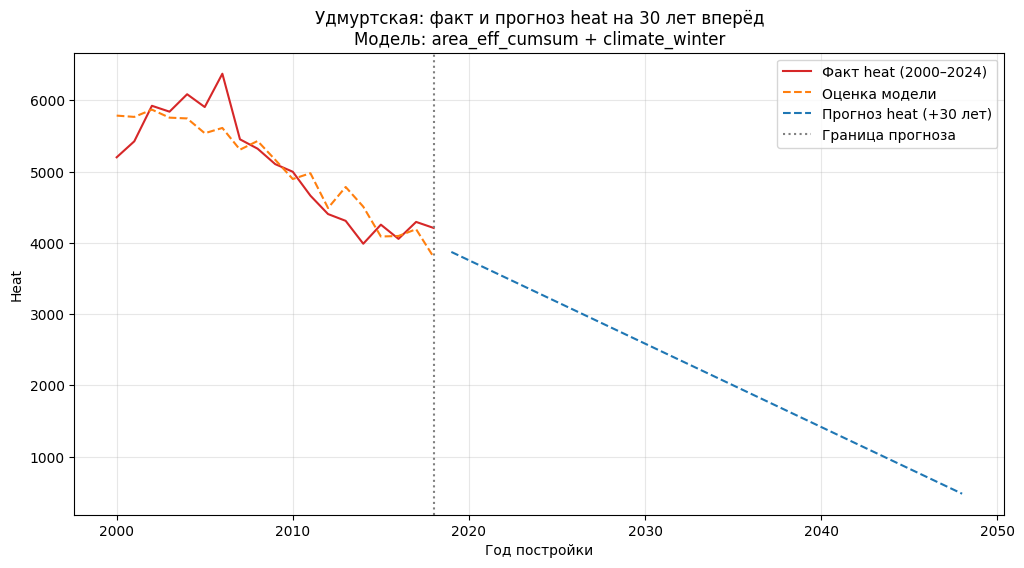

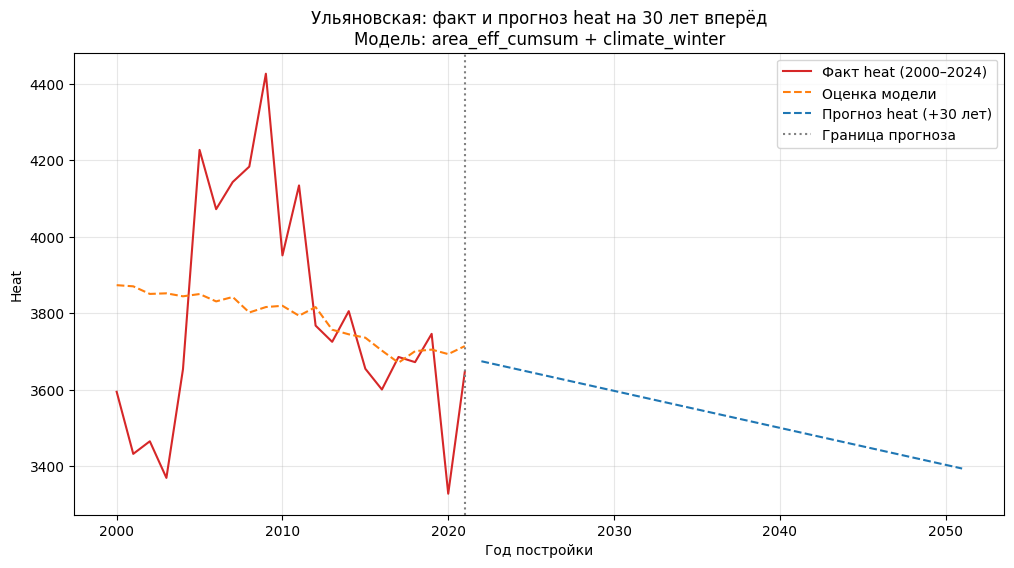

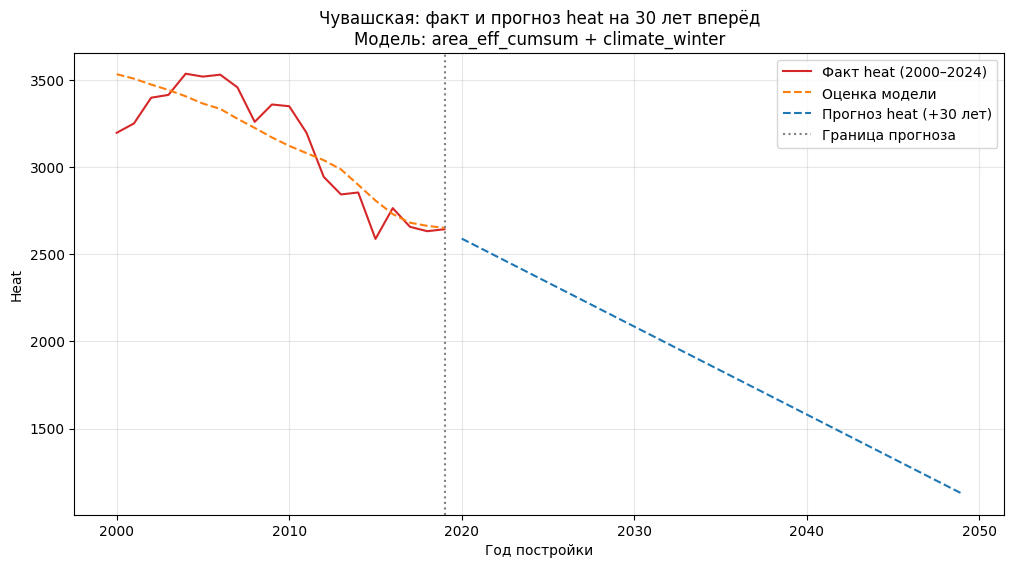

           Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0    Башкортостан  13661.898887             -0.000123          -442.453464   
1       Кировская  10241.921863             -0.000276            25.734735   
2        Марий Эл    933.687239              0.000078            -1.878725   
3        Мордовия   1614.570061             -0.000045           -48.225330   
4   Нижегородская  16820.202181             -0.000161          -516.511407   
5    Оренбургская  15237.832633             -0.000272            88.745105   
6      Пензенская   4937.366391             -0.000131             9.288877   
7        Пермский  26679.516030             -0.000459          -234.814986   
8       Самарская  19327.572068             -0.000119          -140.498448   
9     Саратовская  16213.281606             -0.000233           103.699007   
10      Татарстан  10009.679074             -0.000031          -280.904891   
11     Удмуртская  24601.666891             -0.000688           

In [35]:
#ПФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .mean()
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


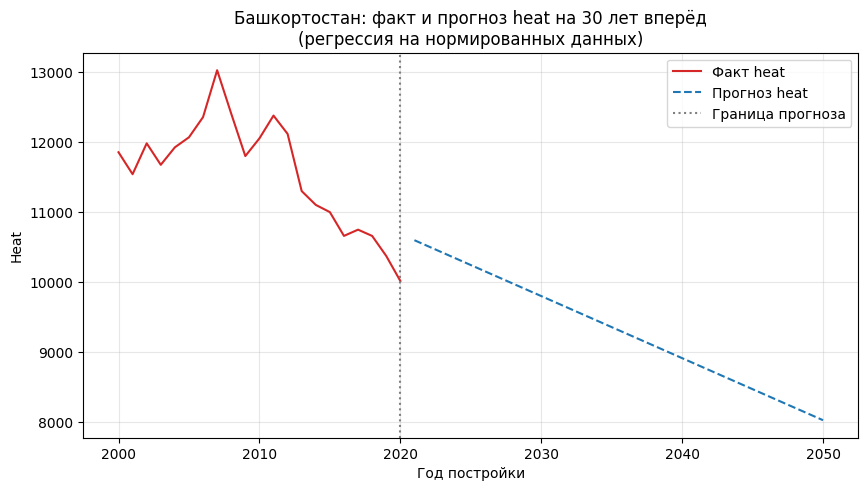

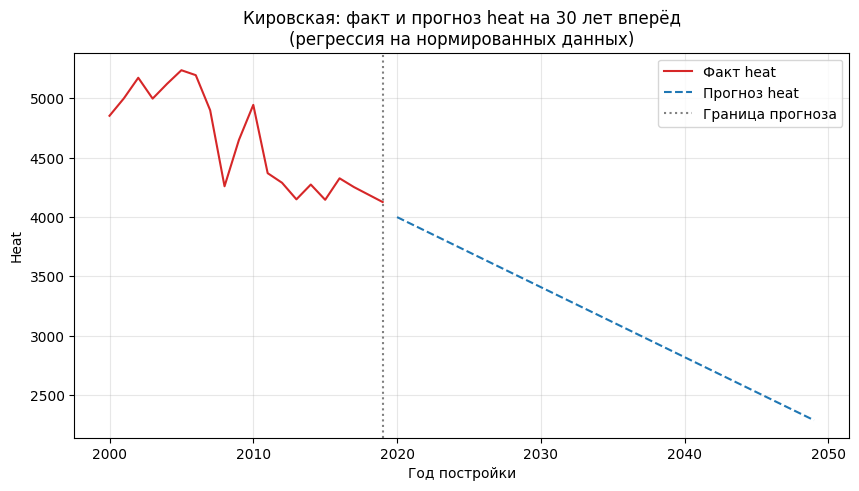

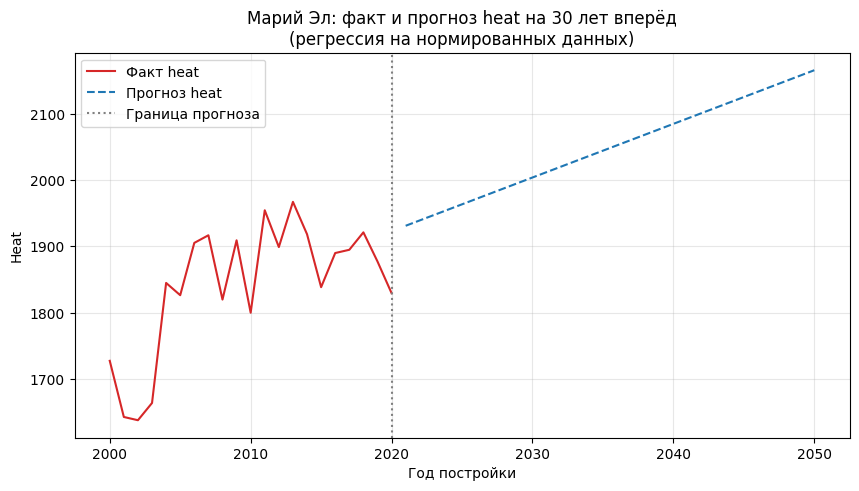

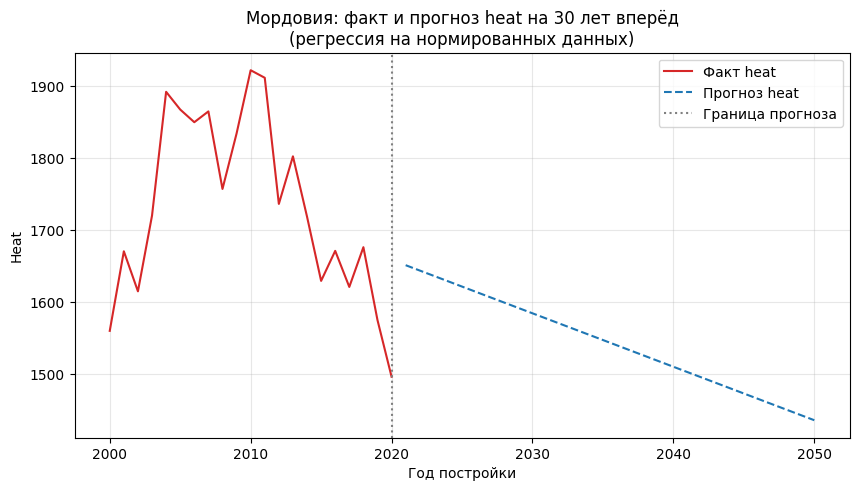

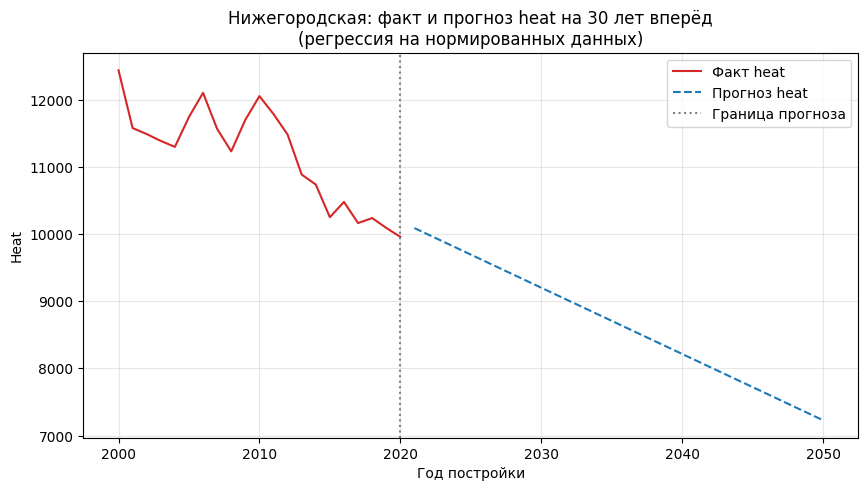

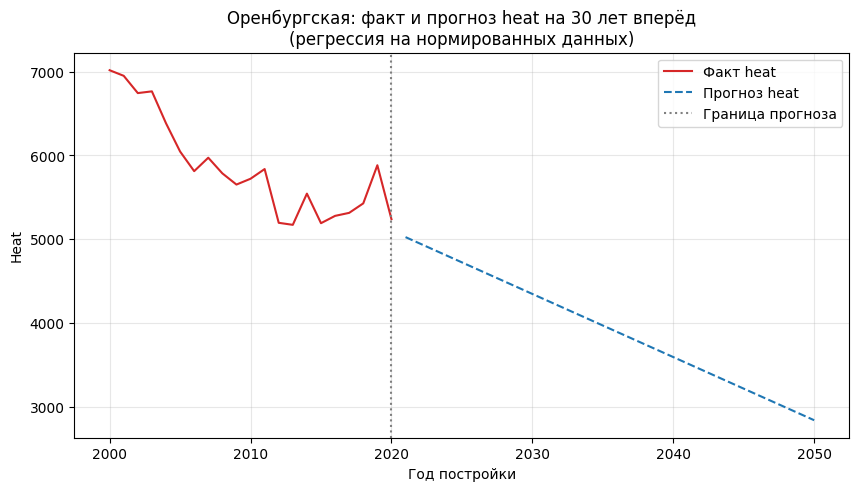

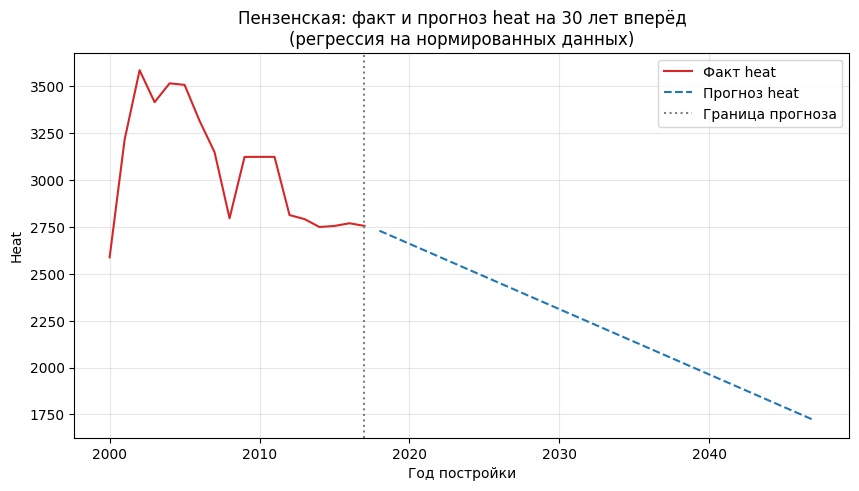

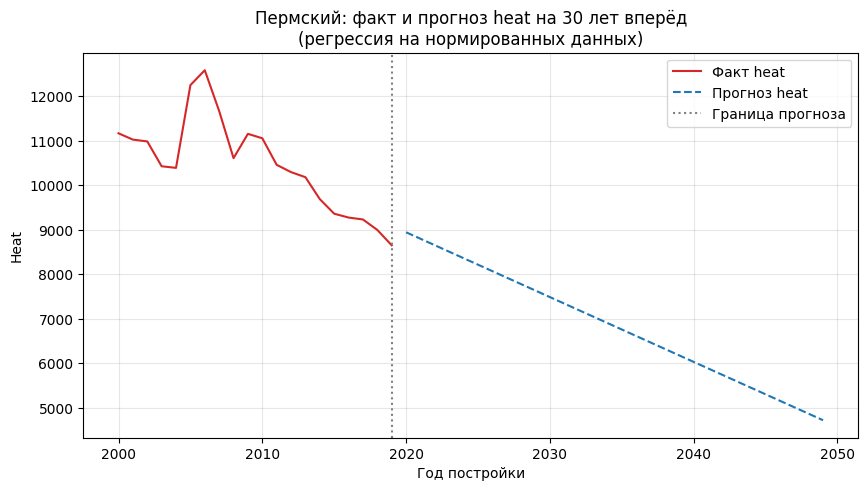

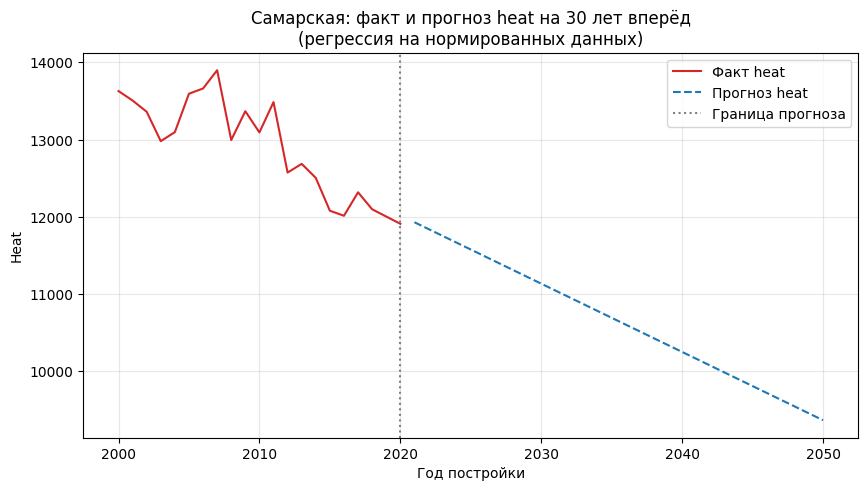

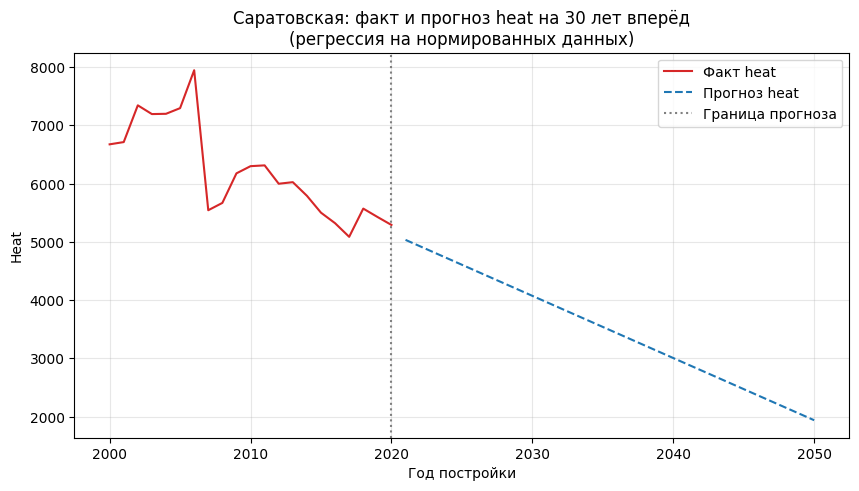

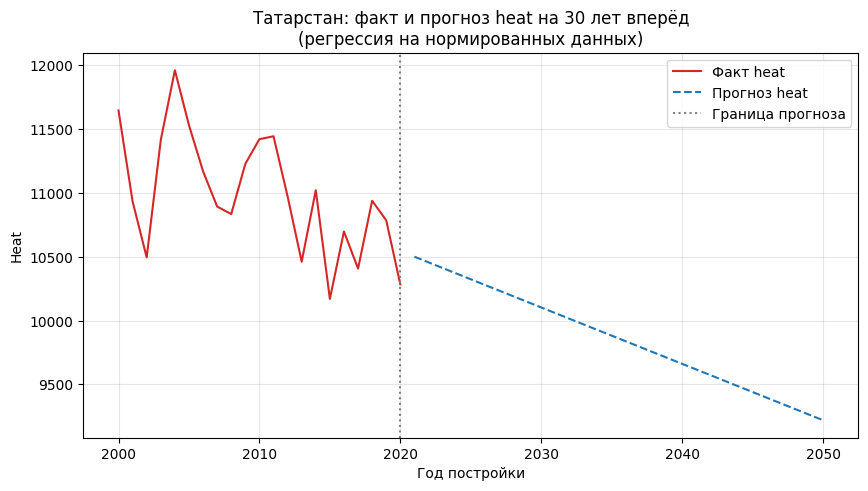

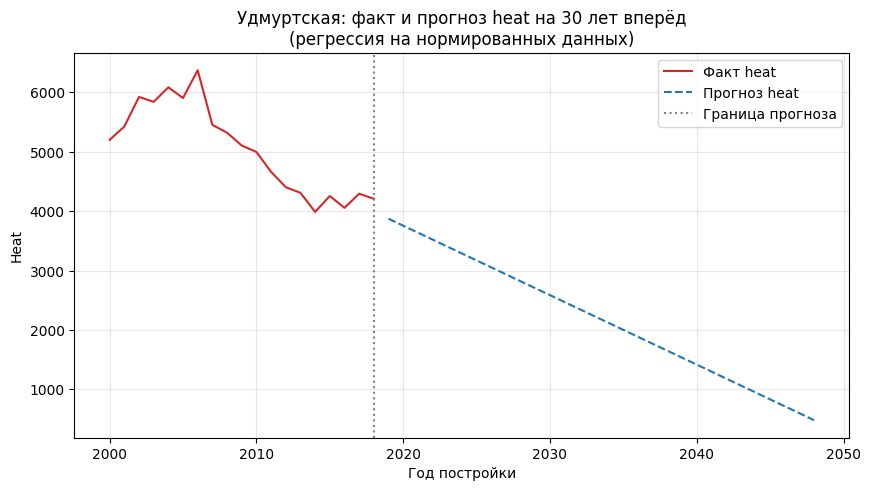

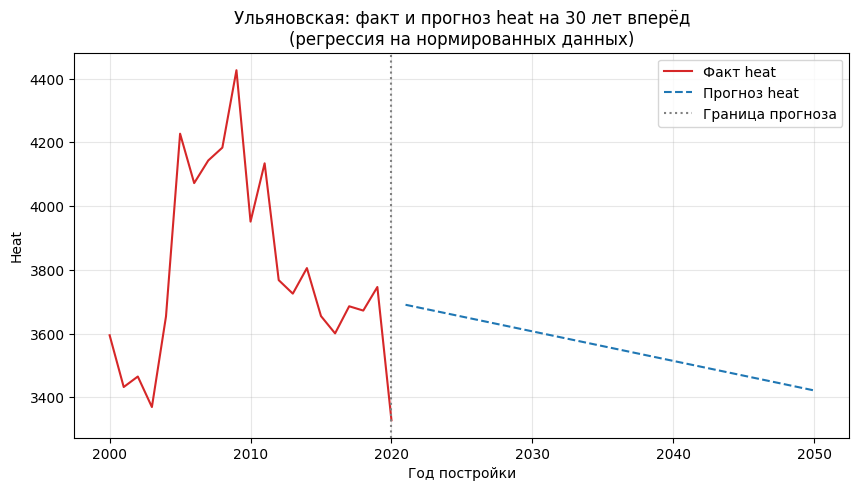

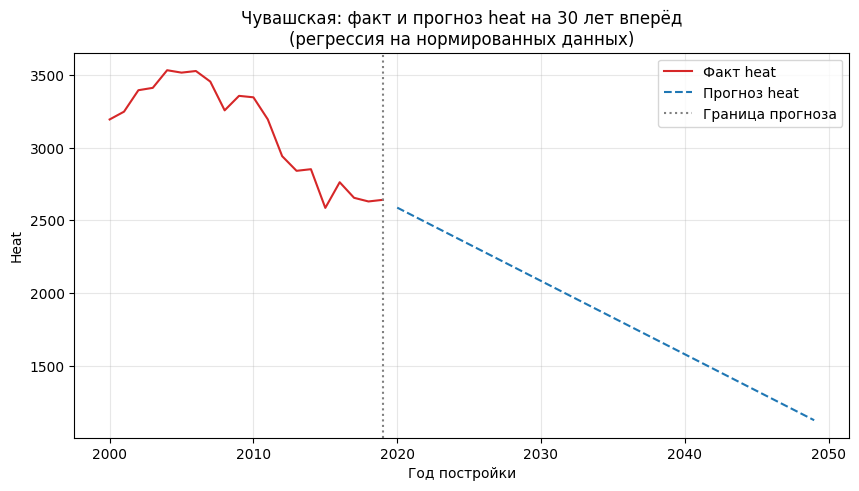

           Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0    Башкортостан  11571.868095           -373.645457          -238.744509   
1       Кировская   4644.399474           -344.203952            11.511457   
2        Марий Эл   1841.920952             50.861653            -0.843125   
3        Мордовия   1733.077143            -28.769865           -23.635541   
4   Нижегородская  11174.889048           -439.597840          -231.630939   
5    Оренбургская   5853.157619           -502.464373            55.514855   
6      Пензенская   3060.005556           -185.622638             4.220562   
7        Пермский  10474.410000           -782.935890          -104.450380   
8       Самарская  12941.253000           -476.452048           -64.149351   
9     Саратовская   6207.278095           -686.095184            46.537532   
10      Татарстан  10985.219524           -182.003351          -126.063121   
11     Удмуртская   5042.678947           -790.895364           

In [36]:
#ПФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .mean()
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
